## **Import Libraries**

In [0]:
#pip install -U keras

In [0]:
import keras
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from keras.layers import Dense, Input, LeakyReLU
from keras import layers
from keras import optimizers, activations
from keras import regularizers
from keras import initializers
from keras.models import Model

from sklearn import metrics
import tensorflow as tf
import tensorflow.keras


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **setup seed for Numpy**

In [0]:
seed = 8000

np.random.seed(seed)
np.random.RandomState(seed)
tf.random.set_seed(seed)


## **Load Data (Valence)**

In [0]:
data = sio.loadmat('/content/drive/My Drive/Colab Notebooks/emt_valence_sample.mat')

In [0]:
######################################## Input data  ########################################
    
#sbjinfo = sio.loadmat('%s/emt_valence_sample.mat' % rootpath)
    
############# emt_sample_data.mat #############
    
# train_x  = 64 volumes x 55417 voxels  
    
# train_y  = 64 volumes x 1 [valence, arousal or dominance scores for training]
    
# test_x  = 16 volumes x 55417 voxels
    
# test_y  = 16 volumes x 1 [valence, arousal or dominance scores for test]
    

# Total 80 Volume
##############################################################################################

In [0]:
train_x_ =  data["train_x"]
train_y_ = data["train_y"]
test_x_  = data["test_x"]
test_y_  = data["test_y"]

In [0]:
print('x_train: ', train_x_.shape)
print('y_train: ', train_y_.shape)
print('x_test: ', test_x_.shape)
print('y_test: ', test_y_.shape)

x_train:  (64, 55417)
y_train:  (1, 64)
x_test:  (16, 55417)
y_test:  (1, 16)


In [0]:
print(train_y_)

[[3. 5. 2. 2. 5. 5. 2. 5. 3. 2. 8. 2. 7. 4. 5. 7. 2. 5. 5. 3. 2. 5. 4. 7.
  3. 8. 3. 5. 7. 4. 2. 3. 5. 5. 5. 5. 5. 7. 2. 4. 7. 5. 5. 5. 7. 6. 2. 5.
  5. 6. 5. 5. 4. 5. 4. 5. 5. 2. 5. 5. 6. 5. 4. 2.]]


In [0]:
print(test_y_)   # 1 * 16

[[2. 5. 5. 2. 4. 4. 2. 5. 5. 2. 4. 6. 3. 3. 6. 5.]]


In [0]:
print(test_x_)  # p-value of voxels   (16 volume * 55417 voxel)

[[ 0.08788553  0.46553868  0.64675248 ... -0.0581847   0.25451481
   0.13673303]
 [ 0.254897    0.09647342 -0.12851712 ... -0.17406599 -0.22913195
  -0.30520836]
 [-0.48013192 -0.19519651 -0.25238222 ...  0.21196255  0.12703349
   0.32691196]
 ...
 [-0.81392348  0.4484911   0.28061408 ...  0.17541884  0.02401625
   0.26148343]
 [-0.11555411  0.24957168  0.2861537  ... -1.01044345 -0.88597345
  -0.74992502]
 [ 0.33238256 -0.04226859 -0.06302105 ... -0.40129849 -0.23761404
  -0.46138731]]


## **No CV**

In [0]:
#train_x = sbjinfo['train_x']; 
#train_y = np.asarray(sbjinfo['train_y'], 'float32').flatten() / scal_ref ;
    
#test_x = sbjinfo['test_x'];
#test_y = np.asarray(sbjinfo['test_y'], 'float32').flatten() / scal_ref ;

np.random.RandomState(seed)

ind_train = np.random.permutation(64)  # select 64 shuffle indexes
ind_test = np.random.permutation(16)

x_train = train_x_[ind_train]
y_train = train_y_.astype('float32') / 10

x_test = test_x_[ind_test]
y_test = test_y_.astype('float32') / 10



In [0]:
print(y_train)

[[0.3 0.5 0.2 0.2 0.5 0.5 0.2 0.5 0.3 0.2 0.8 0.2 0.7 0.4 0.5 0.7 0.2 0.5
  0.5 0.3 0.2 0.5 0.4 0.7 0.3 0.8 0.3 0.5 0.7 0.4 0.2 0.3 0.5 0.5 0.5 0.5
  0.5 0.7 0.2 0.4 0.7 0.5 0.5 0.5 0.7 0.6 0.2 0.5 0.5 0.6 0.5 0.5 0.4 0.5
  0.4 0.5 0.5 0.2 0.5 0.5 0.6 0.5 0.4 0.2]]


In [0]:
y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)


print(y_test.shape)
#y_test

(16, 1)


# **Parameters of Model**

In [0]:
[n_in, n_hidden1, n_hidden2, n_hidden3, n_out] = [55417, 20, 20, 20, 1]  # DNN strcture


n_epochs = 500      # the total number of epoch
batch_size = 2      # batch size 

l_rate = 0.005    # learning rate 
momentum = 0.01     # momentum
dcay_rate = 0.99    # decay learning rate for the learning rate 

rng = np.random.RandomState(8000)

# **Create Model**

In [0]:
#Dense Layer Defaults
'''keras.layers.Dense(units,
                   activation=None,
                   use_bias=True,
                   kernel_initializer='glorot_uniform',
                   bias_initializer='zeros',
                   kernel_regularizer=None,
                   bias_regularizer=None,
                   activity_regularizer=None,
                   kernel_constraint=None,
                   bias_constraint=None)
'''

# tf.keras.initializers.he_uniform( seed=None ).
# It draws samples from a uniform distribution within [-limit, limit]
# where limit is sqrt(6 / fan_in)

"keras.layers.Dense(units,\n                   activation=None,\n                   use_bias=True,\n                   kernel_initializer='glorot_uniform',\n                   bias_initializer='zeros',\n                   kernel_regularizer=None,\n                   bias_regularizer=None,\n                   activity_regularizer=None,\n                   kernel_constraint=None,\n                   bias_constraint=None)\n"

In [0]:
np.random.seed(seed)

low   = -np.sqrt(6. / (n_in + n_out))
high  = np.sqrt(6. / (n_in + n_out))
L1_a  = np.sqrt(6. / n_in + n_hidden1)
L2_a  = np.sqrt(6. / n_hidden1 + n_hidden2)
L3_a  = np.sqrt(6. / n_hidden2 + n_hidden3)
out_a = np.sqrt(6. / n_hidden3 + n_out)
#kernel_initializer = initializers.RandomUniform(minval= -1*L1_a, maxval= L1_a),



#Add Layers
# Input layer (55417 feature --> 55417 input node)
x_in = layers.Input(shape = (x_train.shape[1], ))  


# glorot_uniform for tanh
# he_uniform for relu
L1 = layers.Dense(n_hidden1, activation = activations.relu,
                  kernel_initializer = initializers.he_uniform(seed= seed)  
                  )(x_in)   


D1 = layers.Dropout(0.0)(L1)

L2 = layers.Dense(n_hidden2, activation = activations.relu,
                  kernel_initializer = initializers.he_uniform(seed= seed)
                  )(D1)

D2 = layers.Dropout(0.1)(L2)


L3 = layers.Dense(n_hidden3, activation = activations.relu,
                  kernel_initializer = initializers.he_uniform(seed= seed)
                  )(D2)

D3 = layers.Dropout(0.21)(L3)

y_out = layers.Dense(n_out, activation = activations.linear,
                     kernel_initializer = initializers.uniform(seed= seed)   # uniform for linear
                     )(D3)  # Output layer  1 output node)




#Create Model
model = Model(x_in, y_out)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 55417)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1108360   
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0   

# **Custom Metrics**

In [0]:
import keras.backend as K

def tf_pearson(y_true, y_pred):
  #return tf.compat.metrics.streaming_pearson_correlation(y_pred, y_true)[1]
  return tf.contrib.metrics.streaming_pearson_correlation(y_pred, y_true)


def mean_pred(y_true, y_pred):
  return K.mean(y_pred)


def STD_pred(y_true, y_pred):
  return K.std(y_pred)


def rmse(y_true, y_pred):
	return K.sqrt(K.mean(K.square(y_pred - y_true), axis= -1))



def coeff_determination(y_test, y_pred):
    SS_res =  K.sum(K.square(y_test - y_pred ))
    SS_tot = K.sum(K.square( y_test - K.mean(y_test) ) )
    return ( 1 - SS_res / (SS_tot + K.epsilon()))



# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ( 1 - SS_res / (SS_tot + K.epsilon()))

   

# **Compile Model**

In [0]:
# SGD(lr= 0.005, decay= 0.8, momentum= 0.01)  good
# adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
# Adamax(lr= 0.0001, beta_1= 0.9, beta_2= 0.999)  0.002 
# rmsprop(learning_rate= 0.001)
# Adadelta(learning_rate= 0.001, rho= 0.95)


model.compile(optimizer= optimizers.Adamax(lr= 0.0001, beta_1= 0.9, beta_2= 0.999), 
              loss= keras.losses.mean_squared_error,
              metrics= ['mse', 'mae', 'mape', rmse, r_square, mean_pred, STD_pred])


# **Callbacks**

In [0]:
class prediction_history(keras.callbacks.Callback):
    def __init__(self):
        self.pred_train = []
        self.pred_test  = []

    def on_epoch_end(self, epoch, logs={}):
        self.pred_train.append(model.predict(x_train))
        self.pred_test.append(model.predict(x_test))

# **Train Model**

In [0]:
# callbacks
cbk = prediction_history()



history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = n_epochs,
                    validation_split = 0.2,
                    callbacks = [cbk]
                    #validation_data=(x_train[:20], y_train[:20])
                    )


Train on 51 samples, validate on 13 samples
Epoch 1/500
51/51 [==============================] - 1s 13ms/step - loss: 0.1148 - mse: 0.1148 - mae: 0.2893 - mape: 64.1953 - rmse: 0.2893 - r_square: 163290.6875 - mean_pred: 0.2394 - STD_pred: 0.0795 - val_loss: 0.0678 - val_mse: 0.0678 - val_mae: 0.2140 - val_mape: 54.6667 - val_rmse: 0.2140 - val_r_square: 258324.6094 - val_mean_pred: 0.3121 - val_STD_pred: 0.1222
Epoch 2/500
51/51 [==============================] - 0s 6ms/step - loss: 0.0580 - mse: 0.0580 - mae: 0.1864 - mape: 44.9867 - rmse: 0.1864 - r_square: 337318.9375 - mean_pred: 0.3585 - STD_pred: 0.1030 - val_loss: 0.0620 - val_mse: 0.0620 - val_mae: 0.2040 - val_mape: 53.2404 - val_rmse: 0.2040 - val_r_square: 116693.1719 - val_mean_pred: 0.3632 - val_STD_pred: 0.1296
Epoch 3/500
51/51 [==============================] - 0s 7ms/step - loss: 0.0723 - mse: 0.0723 - mae: 0.2122 - mape: 50.3825 - rmse: 0.2122 - r_square: 689041.1250 - mean_pred: 0.3598 - STD_pred: 0.1195 - val_loss:

In [0]:
ptrain_list = cbk.pred_train
ptest_list  = cbk.pred_test

#print(ptrain_list)

pct_trvld = np.stack(ptrain_list, axis = 0 ).reshape(n_epochs, x_train.shape[0])
pct_tst   = np.stack(ptest_list,  axis = 0 ).reshape(n_epochs, x_test.shape[0])
#print(pct_tst)

# **Plot Metrics**

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_rmse', 'val_r_square', 'val_mean_pred', 'val_STD_pred', 'loss', 'mse', 'mae', 'mape', 'rmse', 'r_square', 'mean_pred', 'STD_pred'])

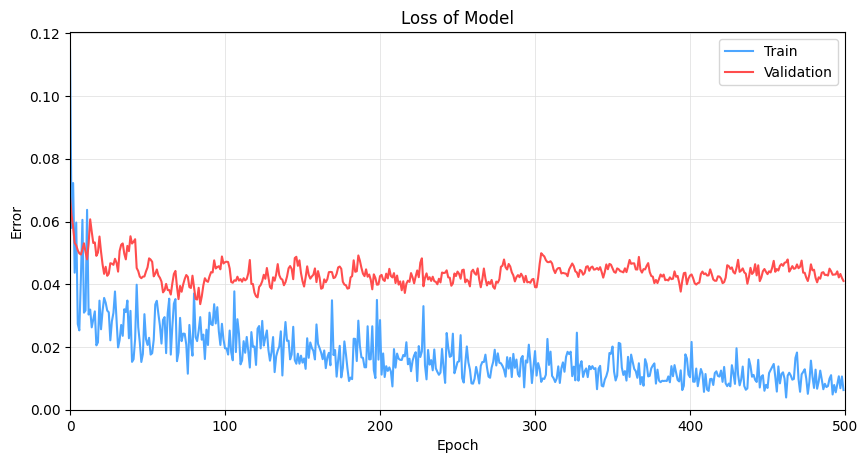

In [0]:
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(history.history['loss'], label='Train', color='#4da6ff')

plt.plot(history.history['val_loss'], label='Validation', color='#ff4d4d')


plt.title('Loss of Model')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim(0, n_epochs)
plt.ylim(0, )
#plt.axis([0, n_epochs, 0, 1])
plt.grid(color='#ddd', ls = '-', lw = 0.5)
plt.legend()
plt.show()

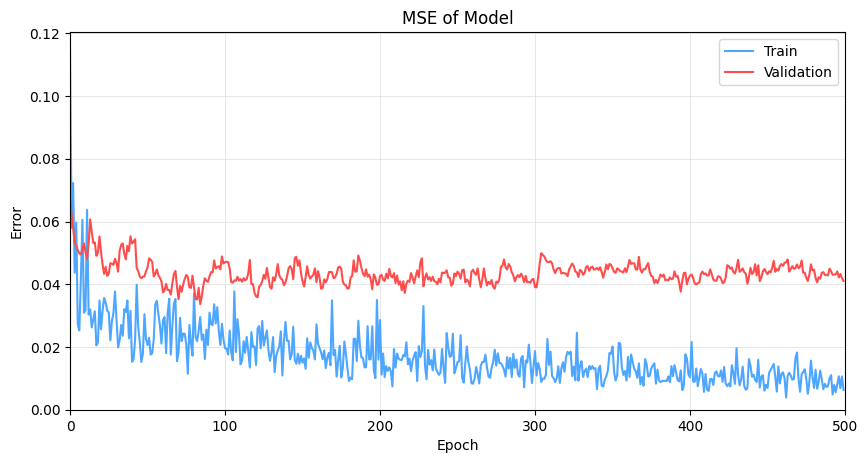

0.017188583


<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(history.history['mse'], label='Train', color='#4da6ff')

plt.plot(history.history['val_mse'], label= 'Validation', color='#ff4d4d')
plt.title('MSE of Model')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim(0, n_epochs)
plt.ylim(0, )
plt.grid(color='#ddd', ls = '-', lw = 0.5)
plt.legend()
plt.show()

plt.savefig('loss.png')

msee=history.history['mse']
print(np.mean(msee))

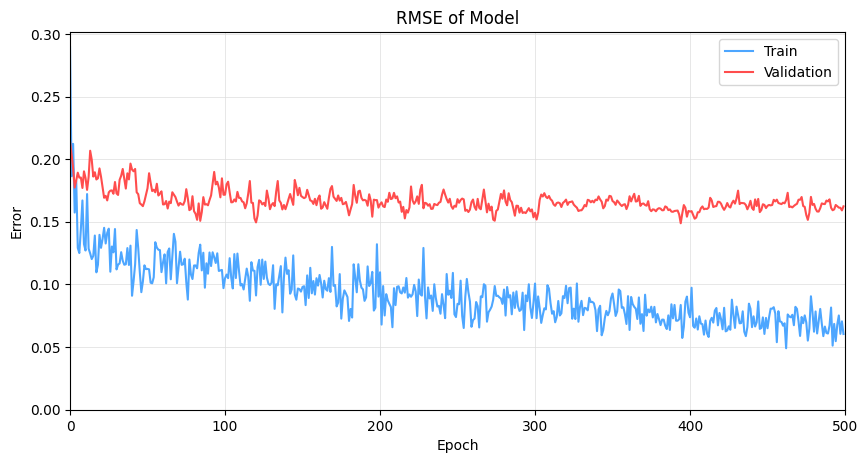

In [0]:
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(history.history['rmse'], label='Train', color='#4da6ff')

plt.plot(history.history['val_rmse'], label='Validation', color='#ff4d4d')

plt.title('RMSE of Model')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim(0, n_epochs)
plt.ylim(0, )
plt.grid(color='#ddd', ls = '-', lw = 0.5)
plt.legend()
plt.show()

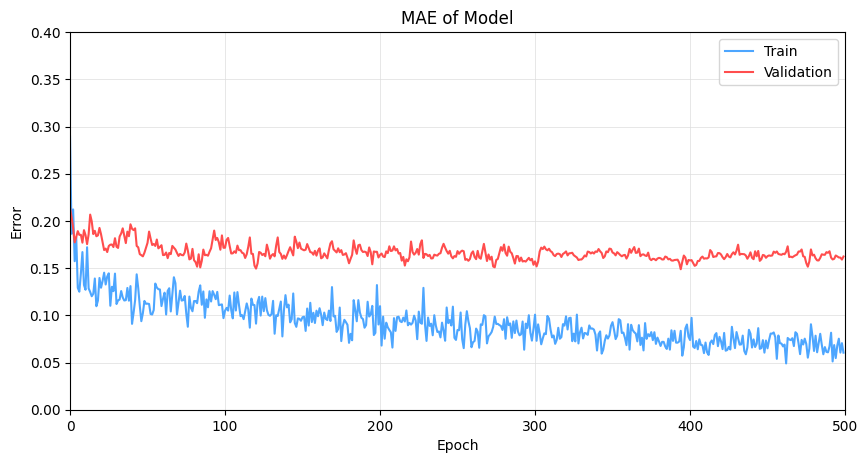

In [0]:
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(history.history['mae'], label='Train', color='#4da6ff')

plt.plot(history.history['val_mae'], label='Validation', color='#ff4d4d')

plt.title('MAE of Model')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim(0, n_epochs)
plt.ylim(0, 0.40)
plt.grid(color='#ddd', ls = '-', lw = 0.5)
plt.legend()
plt.show()


# **Predict Pattern**

Patterns of Estimated Emotion Response from **Training Data**


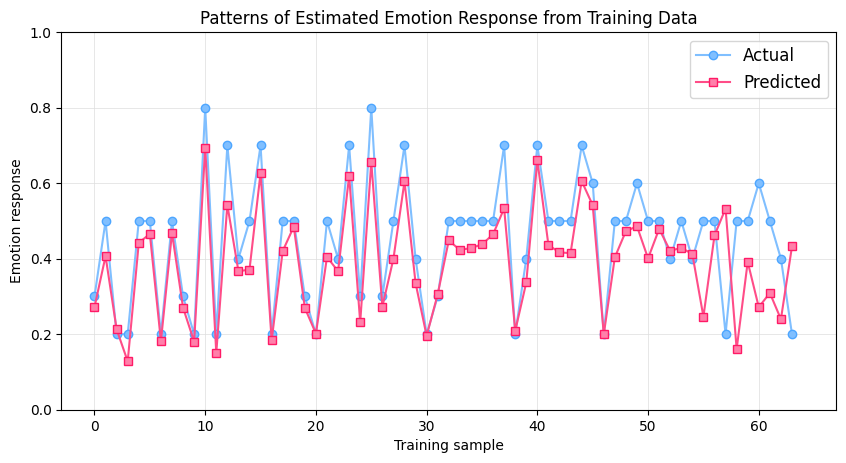

In [0]:
#make preediction
pred_train = model.predict(x_train)

#save prediction
testData = pd.DataFrame(y_train)
preddData = pd.DataFrame(pred_train)


dataF = pd.concat([testData, preddData], axis=1)
dataF.columns =['Real demand','Predicted Demand']
dataF.to_csv('Demandprediction.csv')


plt.figure(figsize=(10, 5), dpi=100)
plt.plot(y_train, label='Actual',color='#80bfff', marker='o', MarkerEdgeColor='#4da6ff',MarkerFaceColor='#80bfff')
plt.plot(pred_train, label='Predicted', marker='s', color='#ff4d88', MarkerEdgeColor='#ff1a66',MarkerFaceColor='#ff80aa')

plt.xlim(-3, y_train.shape[0]+3)
plt.ylim([0, 1])
plt.title('Patterns of Estimated Emotion Response from Training Data')
plt.xlabel('Training sample')
plt.ylabel('Emotion response')
plt.legend(loc='best', fontsize='large')
plt.grid(color='#ddd', ls = '-', lw = 0.5)
plt.show()

Patterns of Estimated Emotion Response from **Test Data**

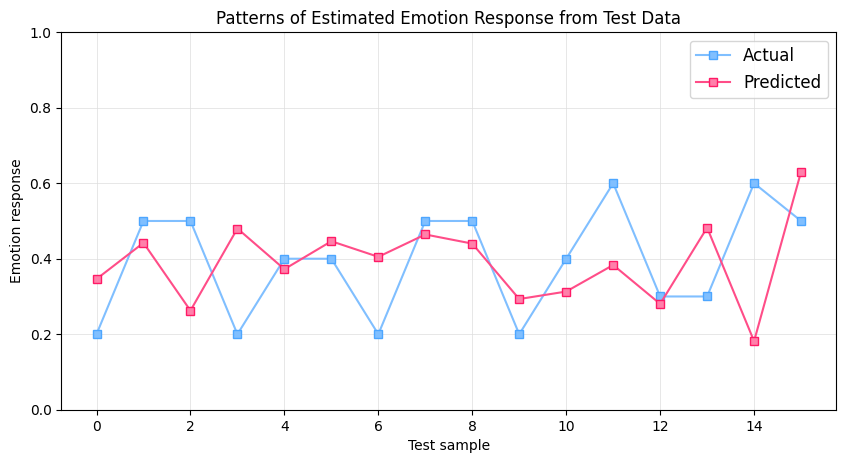

In [0]:
#make preediction
pred = model.predict(x_test)

#save prediction
testData = pd.DataFrame(y_test)
preddData = pd.DataFrame(pred)

dataF = pd.concat([testData, preddData], axis=1)
dataF.columns =['Real demand', 'Predicted Demand']
dataF.to_csv('Demandprediction.csv')


plt.figure(figsize=(10, 5), dpi=100)
plt.plot(y_test, label='Actual', marker='s', color='#80bfff', MarkerEdgeColor='#4da6ff',MarkerFaceColor='#80bfff')
plt.plot(pred, label='Predicted', marker='s', color='#ff4d88', MarkerEdgeColor='#ff1a66',MarkerFaceColor='#ff80aa')
plt.ylim([0, 1])
plt.title('Patterns of Estimated Emotion Response from Test Data')
plt.xlabel('Test sample')
plt.ylabel('Emotion response')
plt.legend(loc='best', fontsize='large')
plt.grid(color='#ddd', ls = '-', lw = 0.5)
plt.show()

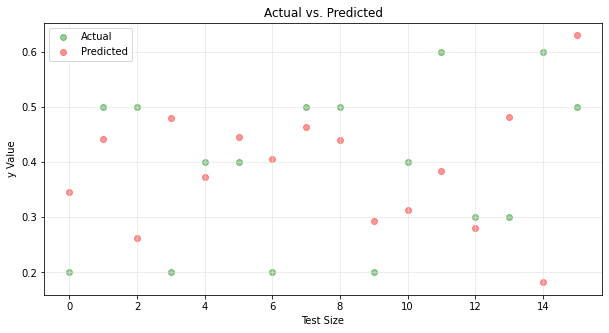

In [0]:
#Visualize Predicted vs. Actual
y_pred = model.predict(x_test)

_, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x = range(0, y_test.size), y= y_test, c = 'green', label = 'Actual', alpha = 0.4)
ax.scatter(x = range(0, y_pred.size), y= y_pred, c = 'red', label = 'Predicted', alpha = 0.4)
plt.title('Actual vs. Predicted')
plt.xlabel('Test Size')
plt.ylabel('y Value')
plt.legend()
plt.grid(color='#ddd', ls = '-', lw = 0.5)
plt.show()


In [0]:
#Model error
score_train = model.evaluate(x_train, y_train, batch_size= 2)
score_test = model.evaluate(x_test, y_test, batch_size= 2)

print("in train MSE = ", np.round(score_train, 4))
print("in test MSE = ", np.round(score_test, 4))


16/16 [==============================] - 0s 1ms/step
in train MSE =  [1.26000000e-02 1.26000000e-02 8.15000000e-02 1.94110000e+01
 8.15000000e-02 5.59107656e+04 3.88200000e-01 7.75000000e-02]
in test MSE =  [3.11000000e-02 3.11000000e-02 1.40200000e-01 4.24895000e+01
 1.40200000e-01 4.56550742e+04 3.88900000e-01 8.21000000e-02]


# **Correlation Coefficient**

In [0]:
# Calculate the correlation coefficients over epochs 
tr_cc = np.zeros((n_epochs))
ts_cc = np.zeros((n_epochs))

for i in range(n_epochs - 1):
    tr_r = np.corrcoef(pct_trvld[i, :], y_train.T)
    ts_r = np.corrcoef(pct_tst[i, :], y_test.T)

    tr_cc[i] = tr_r[1, 0]
    ts_cc[i] = ts_r[1, 0]

CC for Train: 0.82
CC fot Test:  0.05




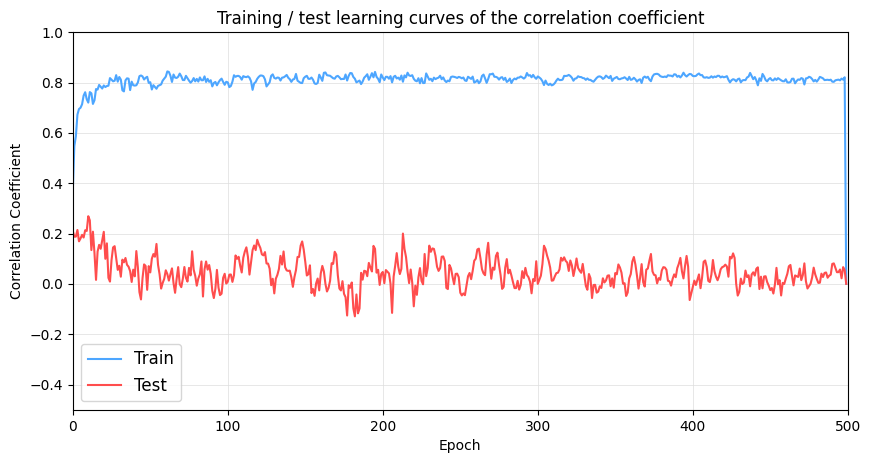

In [0]:
# Training/test learning curves of the correlation coefficient 
t1 = np.arange(0, n_epochs, 1)
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(t1, tr_cc.flatten(), label ='Train', color='#4da6ff')
plt.plot(t1, ts_cc.flatten(), label ='Test' , color='#ff4d4d')

plt.axis([0, n_epochs, -0.5, 1])
plt.grid(color='#ddd', ls = '-', lw = 0.5)
plt.title('Training / test learning curves of the correlation coefficient')
plt.xlabel('Epoch')
plt.ylabel('Correlation Coefficient')
plt.legend(loc = 'best', fontsize='large')

print('CC for Train: %.2f' % tr_cc[n_epochs-2])  
print('CC fot Test:  %.2f' % ts_cc[n_epochs-2])
print('\n')

plt.show()


# **CC**

In [0]:
pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

def CC(y_test, y_pred):
  #being K.mean a scalar here, it will be automatically subtracted from all elements in y_pred
  fsp = y_pred - np.mean(y_pred) 
  fst = y_test - np.mean(y_test)

  devP = np.std(y_pred)
  devT = np.std(y_test)

  return np.mean(fsp * fst) / (devP * devT)


print('CC for Train: %.2f' % CC(y_train, pred_train))   
print('CC for Test:  %.2f' % CC(y_test, y_pred))


CC for Train: 0.82
CC for Test:  -0.02


# **Predict**

## **MSE**

In [0]:
from sklearn import metrics

pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

train_mse = metrics.mean_squared_error(y_train, pred_train)
test_mse = metrics.mean_squared_error(y_test, y_pred)

print('\nMSE for Train: %.2f' % (train_mse))

y_pred = model.predict(x_test)
print('\nMSE for Test:  %.2f' % (test_mse))



MSE for Train: 0.01

MSE for Test:  0.03


## **RMSE**

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(x_train)
print('RMSE for Train: %.2f' % (np.sqrt(mean_squared_error(y_train, pred_train)) ))


y_pred = model.predict(x_test)
print('RMSE for Test:  %.2f' % (np.sqrt(mean_squared_error(y_test, y_pred)) )) 

RMSE for Train: 0.11
RMSE for Test:  0.18


## **MAE**

In [0]:
from sklearn import metrics

pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

train_mse = metrics.mean_absolute_error(y_train, pred_train)
test_mse = metrics.mean_absolute_error(y_test, y_pred)

print('\nMAE for Train: %.2f' % (train_mse))  # 0.01

y_pred = model.predict(x_test)
print('\nMAE for Test:  %.2f' % (test_mse))  # 0.10



MAE for Train: 0.08

MAE for Test:  0.14


## **Accuracy**

In [0]:
train_diff = np.abs(pred_train.round(1) - y_train) 
test_diff = np.abs(y_pred.round(1) - y_test) 


print('\nAccuracy of Train: %.2f' %  (1 - train_diff.sum() / len(train_diff)) )
print('\nAccuracy of Test:  %.2f' %  (1 - test_diff.sum()  / len(test_diff))  )


Accuracy of Train: 0.92

Accuracy of Test:  0.87


# **Evaluate**

In [0]:
val_loss, test_mean_squard_error, test_mean_absolue_error, test_mape_error, RMSE, r2, val_mean_pred, val_STD_pred = model.evaluate(x_test, y_test)

print('\nMean for Test: %.2f' % val_mean_pred)
print('\nSE for Test:   %.2f' % ( val_STD_pred / np.sqrt(len(x_test)) ) )

#print('\nPearson_Correlation: ', Pearson_Correlation)


print('\n--------------------------------------')

print('\nLOSS for Test: %.2f' % val_loss)
print('\nMSE for Test:  %.2f' % test_mean_squard_error)
print('\nMAE for Test:  %.2f' % test_mean_absolue_error)
print('\nMAPE for Test: %.2f' % test_mape_error)
print('\ncoeff for Test: %.2f' % r2)

16/16 [==============================] - 0s 323us/step

Mean for Test: 0.39

SE for Test:   0.03

--------------------------------------

LOSS for Test: 0.03

MSE for Test:  0.03

MAE for Test:  0.14

MAPE for Test: 42.49

coeff for Test: 1.61


# **T-test**

In [0]:
from scipy import stats
y_pred = model.predict(x_test)

print('\n--------------- Train --------------------')

f_val, p_val = stats.ttest_rel(pred_train, y_train)
print( "t-test results:\nF-test= ", f_val, ",\nP-value= ", p_val) 


print('\n--------------- Test --------------------')

f_val2, p_val2 = stats.ttest_rel(y_pred, y_test)
print( "t-test results:\nF-test= ", f_val2, ",\nP-value= ", p_val2)  

#pearson_coef, p_value = stats.pearsonr(y_test, y_pred)
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  


--------------- Train --------------------
t-test results:
F-test=  [-5.23874745] ,
P-value=  [1.98836692e-06]

--------------- Test --------------------
t-test results:
F-test=  [-0.10589373] ,
P-value=  [0.91706984]


# **ANOVA**

In [0]:
print('\n--------------- Train --------------------')

f_val, p_val = stats.f_oneway(pred_train, y_train)
print( "ANOVA results:\nF-test= ", f_val, ",\nP-value= ", p_val) 


print('\n--------------- Test --------------------')

f_val2, p_val2 = stats.f_oneway(y_test, y_pred)
print( "ANOVA results:\nF-test= ", f_val2, ",\nP-value= ", p_val2)  


--------------- Train --------------------
ANOVA results:
F-test=  [5.20121046] ,
P-value=  [0.02425077]

--------------- Test --------------------
ANOVA results:
F-test=  [0.01145982] ,
P-value=  [0.91546159]


# Mean

In [0]:
print('%.2f' % np.mean(y_test))
print('%.2f' % np.mean(y_pred))


0.39
0.39


In [0]:
#model.save('adamx1.h5')
#model.save_weights('W_adamx1')
